# Project Milestone 1 

1) 250-500-word narrative describing your original 
   idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model.

As part of project, I have choosen to analyse and build a model using the Vehicle data.

In the automotive sector, pricing analytics play an essential role for both companies and individuals to assess the market price of a vehicle before putting it on sale or buying it.

there are millions of cars being sold in the market every year, efective price strtegies can help organizations to seel the cars for a competitive price and make profits.

There are two main goals I want to achieve with this Data Science Project. 

First, to estimate the price of used cars by taking into account a set of features like price, odometer and year of the vehicle based on historical data. 

Second, to get a better understanding on the most relevant features that help determine the price of a used vehicle it means, which features are the most relevant ones when estimating the dependent variable “price”.

The data that will be used for this project is accessible at Kaggle and has been scraped from Craigslist, the world’s largest collection of used vehicles for sale.

The Database consists of 426,880 rows and 26 features, one of which will be the continuous dependent variable (“price”) that we want to predict.

The numerical features play a big role in this Regression model, so it is important to understand well how are they distributed in the Database.

As part of this project we will first perfom the EDA, it means, will have to find the outliners and NaaN values/ missing values from the dataset, so that we can better train our model.

Also we need to check for any duplicates,if so, we will have to delete them and keep only one row for each unique record.


2) Do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing. Write a short overview/conclusion of the insights gained from your graphical analysis.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set(); 

In [2]:
# Read movie data tsv file 
vehicle_data=pd.read_csv('vehicles.csv')

In [3]:
vehicle_data.shape

(426880, 26)

In [4]:
vehicle_data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# correlation between the features.

<AxesSubplot:>

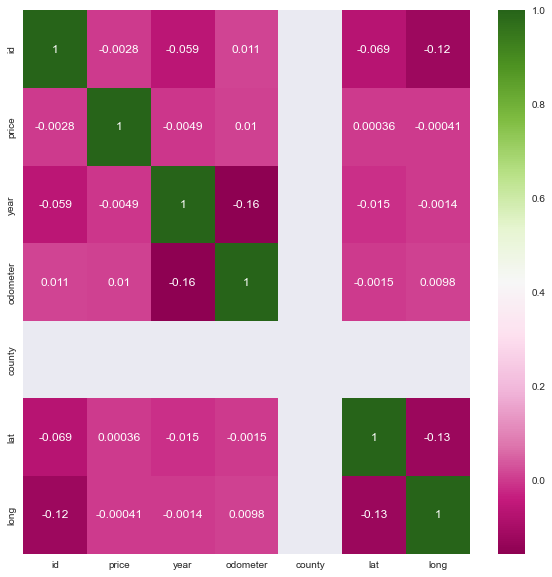

In [5]:

#Heatmaps are the maps that are one of the best ways to find the correlation between the features.
#When the heatmaps is plotted we can see a strong dependency between the Price and odometer.
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
c= vehicle_data.corr()
sns.heatmap(c,cmap='PiYG',annot=True)

# Outliers in Price and odometer

C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

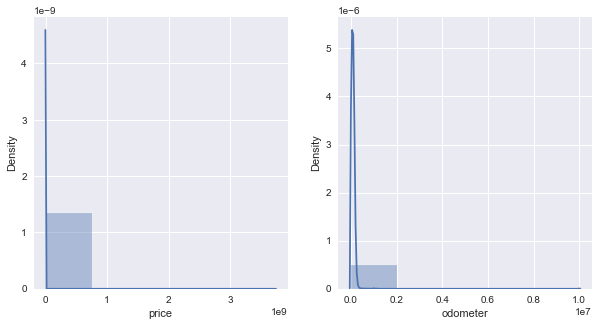

In [6]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(vehicle_data['price'],bins=5)
plt.subplot(122)
sns.distplot(vehicle_data['odometer'],bins=5)

Since “price” had such a big difference between the minimum value and the 25% percentile as well as between the maximum value and the 75% percentile, I will be leaving out 10% of the values on each end.

# Scatter Plot for price outliers

In [7]:
# First will drop 10% of each side on Price

rr=sorted(vehicle_data['price'])
quantile1,quantile2=np.percentile(rr,[10,90])
print(quantile1,quantile2)

500.0 37590.0


In [8]:
vehicle_data=vehicle_data[(vehicle_data.price<=37590) & (vehicle_data.price>=500)]

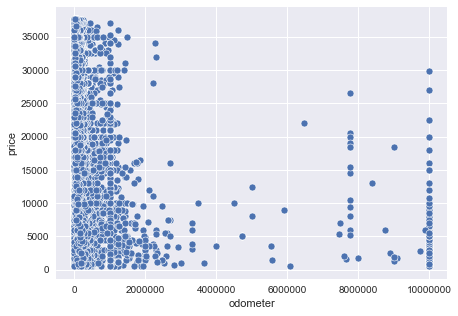

In [9]:
plt.figure(figsize=[7,5])
ax=sns.scatterplot(x=vehicle_data['odometer'],y=vehicle_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [10]:
number_of_vehicles=vehicle_data.groupby(by=["year"], dropna=True).count()

In [11]:
number_of_vehicles

,id,url,region,region_url,price,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
year,,,,,,,,,,,,,,,,,,,,,
1900.0,3,3,3,3,3,1,3,2,0,3,...,0,2,1,3,3,0,3,3,3,3
1901.0,2,2,2,2,2,0,2,1,1,2,...,1,1,1,2,2,0,2,2,2,2
1905.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1909.0,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
1910.0,2,2,2,2,2,0,2,2,2,2,...,0,2,2,2,2,0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.0,24569,24569,24569,24569,24569,24252,24534,16218,11236,24392,...,4300,21698,18052,24569,24569,0,24569,24415,24415,24569
2019.0,14884,14884,14884,14884,14884,14672,14870,9924,6830,14757,...,2308,13021,11168,14884,14884,0,14884,14785,14785,14884
2020.0,9583,9583,9583,9583,9583,9389,9571,7412,2968,9501,...,767,8566,7368,9583,9583,0,9583,9573,9573,9583


# Number of vehicles by Year for Sale

<AxesSubplot:xlabel='year'>

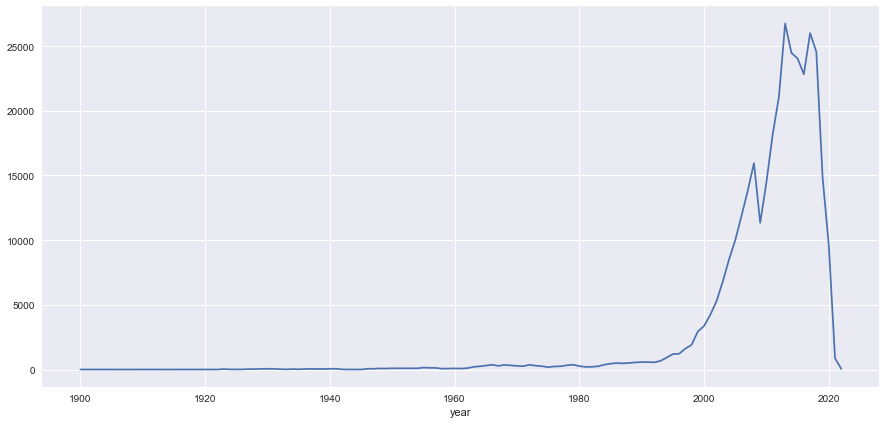

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
vehicle_data.groupby(['year']).count()['id'].plot(ax=ax)

# Conclusion

Based on the Above data and graphs, I understand that there are lot of outliners in the price features,also have NaaN,null and missing values in other features, in order to train the model,
but most of the features have hightest missing values, we should first clean up the data and filter the data to get the insights. 
Description column has the useful information for our model, we should write regular expression on description column to filter the useful info like car make etc.

I am planning to use Random Forest Regression model to get the “price” predictions.

# Project Milestone 2

# 1) Drop any features that are not useful for your model building and explain why they are not useful.

we will drop few columns which are not useful for our price prediction. since we are not predicting the price based on the langitude, latitude, VIN number, URL, id and image columns, so these column are redundant for our model, lets drop them to improve the performace.

In [13]:
# Read movie data tsv file 
df_vehicle_data=pd.read_csv('vehicles.csv')

In [14]:
df_vehicle_data.shape

(426880, 26)

In [15]:
df_vehicle_data

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [16]:
df_vehicle_data.drop(['lat','long','region_url','url','VIN','county','id','image_url'],axis=1,inplace=True)

In [17]:
df_vehicle_data.shape

(426880, 18)

# 2) Perform any data extraction/selection steps.

1) select Vehiles where price less than or equal to 20,000

In [18]:
vehicle_less_20000=vehicle_data[(vehicle_data.price<=20000)]

In [19]:
vehicle_less_20000

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426854,7302103092,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,7977,2009.0,toyota,matrix,NaN,NaN,...,NaN,sedan,blue,https://images.craigslist.org/00R0R_9w54F9aZHi...,2009 Toyota Matrix S AWD 4-Speed AT ☎ 406-283-...,NaN,wy,45.7629,-108.5390,2021-04-05T10:12:43-0600
426855,7302100739,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,7477,2012.0,fiat,500,NaN,NaN,...,NaN,hatchback,NaN,https://images.craigslist.org/00u0u_kPte1d9m0P...,2012 Fiat 500 Sport ☎ 406-283-3311 Call or Tex...,NaN,wy,45.7629,-108.5390,2021-04-05T10:09:12-0600
426856,7302099628,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,5477,2003.0,nissan,murano,NaN,NaN,...,NaN,SUV,blue,https://images.craigslist.org/00Q0Q_cRLD5gcocY...,2003 Nissan Murano SE AWD ☎ 406-283-3311 Call ...,NaN,wy,45.7629,-108.5390,2021-04-05T10:07:34-0600
426869,7301592693,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,13990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00v0v_Jjy23qmkm1...,Carvana is the safer way to buy a car During t...,NaN,wy,33.7865,-84.4454,2021-04-04T03:50:17-0600


2) select max/latest year of vehicles where price is less than or equal than 20000

In [20]:
vehicle_less_year_latest=vehicle_less_20000['year'].max()

In [21]:
vehicle_less_year_latest

2022.0

So we have vehicles from year 2022 with less than or euqals to $20000 price

3) Find highest cost brand vehicle

In [22]:
vehicle_data['price'].max()

37590

In [23]:
vehicle_data[vehicle_data.price==37590]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
81,7311310782,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,37590,2019.0,ford,f150 supercrew cab xl,good,6 cylinders,...,NaN,pickup,NaN,https://images.craigslist.org/00606_eM2dJpJOQb...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-04-23T09:01:04-0500
291,7315785215,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,https://bham.craigslist.org,37590,2019.0,ford,f150 supercrew cab xl,good,6 cylinders,...,NaN,pickup,NaN,https://images.craigslist.org/00606_eM2dJpJOQb...,Carvana is the safer way to buy a car During t...,NaN,al,33.520000,-86.790000,2021-05-02T11:21:00-0500
1743,7302204772,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,https://bham.craigslist.org,37590,2019.0,acura,mdx advance pkg sport,good,NaN,...,NaN,other,silver,https://images.craigslist.org/00j0j_9fdjYAiQKB...,Carvana is the safer way to buy a car During t...,NaN,al,33.520000,-86.790000,2021-04-05T13:41:19-0500
1949,7311290909,https://dothan.craigslist.org/ctd/d/dothan-201...,dothan,https://dothan.craigslist.org,37590,2019.0,ford,f150 supercrew cab xl,good,6 cylinders,...,NaN,pickup,NaN,https://images.craigslist.org/00606_eM2dJpJOQb...,Carvana is the safer way to buy a car During t...,NaN,al,31.230000,-85.400000,2021-04-23T08:21:19-0500
2315,7316237509,https://gadsden.craigslist.org/ctd/d/gadsden-2...,gadsden-anniston,https://gadsden.craigslist.org,37590,2019.0,ford,f150 supercrew cab xl,good,6 cylinders,...,NaN,pickup,NaN,https://images.craigslist.org/00606_eM2dJpJOQb...,Carvana is the safer way to buy a car During t...,NaN,al,34.010000,-86.010000,2021-05-03T11:00:55-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426263,7301728942,https://wausau.craigslist.org/ctd/d/wausau-201...,wausau,https://wausau.craigslist.org,37590,2019.0,acura,mdx advance pkg sport,good,NaN,...,NaN,other,silver,https://images.craigslist.org/00j0j_9fdjYAiQKB...,Carvana is the safer way to buy a car During t...,NaN,wi,44.960000,-89.640000,2021-04-04T13:01:33-0500
426529,7310219622,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,37590,2016.0,toyota,4runner trd pro sport,good,6 cylinders,...,NaN,SUV,NaN,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-21T02:40:10-0600
426532,7310218230,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,37590,2017.0,infiniti,qx80 limited sport,good,8 cylinders,...,NaN,other,white,https://images.craigslist.org/00N0N_iRp2HwE2iJ...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-21T02:20:41-0600
426570,7308646825,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,37590,2020.0,dodge,charger r/t sedan 4d,good,8 cylinders,...,NaN,sedan,purple,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-18T03:50:40-0600


We found 2 cars with hightest price Toyota Tundra SR5 and 99 four runner

# 3) Transform features if necessary.

In [24]:
# Drop duplicates first 
# We will drop the duplicates and keep on of each
df_vehicle_data=df_vehicle_data.drop_duplicates(keep='first')

In [25]:
df_vehicle_data.shape

(426860, 18)

# 4)Engineer new useful features.

It seems description has most details about the car, First, I will be using Regular Expressions on the column “description”. This feature contains the text with the advertisement of each used car.
The goal is to get key information from there in order to fill the NaN values of other columns in the database. The columns we want to fill are those with categorical values that don’t have too many uniques values

In [26]:
import re

manufacturer = '(gmc | hyundai | toyota | mitsubishi | ford | chevrolet | ram | buick | jeep | dodge | subaru | nissan | audi | rover  | lexus \
| honda | chrysler | mini | pontiac | mercedes-benz | cadillac | bmw | kia | volvo | volkswagen | jaguar | acura | saturn | mazda | \
mercury | lincoln | infiniti | ferrari | fiat | tesla | land rover | harley-davidson | datsun | alfa-romeo | morgan | aston-martin | porche \
| hennessey)'
condition = '(excellent | good | fair | like new | salvage | new)'
fuel = '(gas | hybrid | diesel |electric)'
title_status = '(clean | lien | rebuilt | salvage | missing | parts only)'
transmission = '(automatic | manual)'
drive = '(4x4 | awd | fwd | rwd | 4wd)'
size = '(mid-size | full-size | compact | sub-compact)'
type_ = '(sedan | truck | SUV | mini-van | wagon | hatchback | coupe | pickup | convertible | van | bus | offroad)'
paint_color = '(red | grey | blue | white | custom | silver | brown | black | purple | green | orange | yellow)'
cylinders = '(\s[1-9] cylinders? |\s1[0-6]? cylinders?)'

keys =    ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
columns = [ manufacturer,   condition,   fuel,  title_status, transmission ,drive, size, type_, paint_color,   cylinders]

for i,column in zip(keys,columns):
    df_vehicle_data[i] = df_vehicle_data[i].fillna(
      df_vehicle_data['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()

df_vehicle_data.drop('description', axis=1, inplace= True)

C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\906876036.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data[i] = df_vehicle_data[i].fillna(
C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\906876036.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data.drop('description', axis=1, inplace= True)


In [27]:
df_vehicle_data.shape

(426860, 17)

there are values that have been added inconsistently. For example, we have these kinds of values in the same column: ‘awd’ and ‘ awd ’. To unify the strings, the strip() method will be used.

In [28]:
# Take care of inconsistent data
columns=['manufacturer','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']
for i in columns:
    df_vehicle_data[i]=df_vehicle_data[i].str.strip()
    

C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\3200810947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data[i]=df_vehicle_data[i].str.strip()


In [29]:
df_vehicle_data.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
posting_date     object
dtype: object

C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nbaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='odometer', ylabel='Density'>

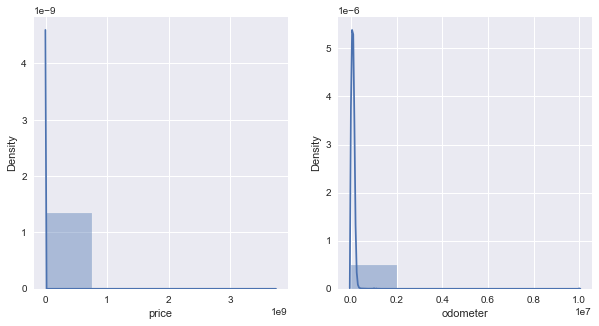

In [30]:
# Outliners in Price and Odometer
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(df_vehicle_data['price'],bins=5)
plt.subplot(122)
sns.distplot(df_vehicle_data['odometer'],bins=5)

Since “price” had such a big difference between the minimum value and the 25% percentile as well as between the maximum value and the 75% percentile, I will be leaving out 10% of the values on each end.

In [31]:
#First I will drop the 10% of each side on price

rr=sorted(df_vehicle_data['price'])
quantile1, quantile2=np.percentile(rr,[10,90])
print(quantile1,quantile2)

500.0 37590.0


In [32]:
df_vehicle_data=df_vehicle_data[(df_vehicle_data.price<=37590) & (df_vehicle_data.price>=500)]


In [33]:
df_vehicle_data.shape

(342623, 17)

Will check the odometer , this feture has NaaN Values, will cehck the outliners using the scatter plot

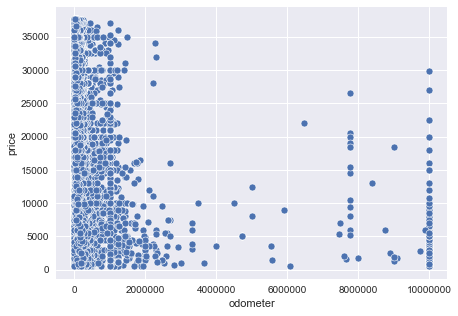

In [34]:
# now check odometer
plt.figure(figsize=[7,5])
ax=sns.scatterplot(x = df_vehicle_data['odometer'],y=df_vehicle_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

# 5) Deal with missing data (do not just drop rows or columns without justifying this).

Since the outliers start at approximately 3,000,000; I will be dropping the values that exceeds that. Also, it is a good idea to drop the minimum value (0) since it greatly differs from the 25% percentile. With this, the feature “odometer” has also been successfully adjusted.

In [35]:
# take only value until 3,00,000
df_vehicle_data=df_vehicle_data[(df_vehicle_data.odometer < 300000)]

In [36]:
# will delete the values equal to 0
df_vehicle_data.drop(df_vehicle_data[df_vehicle_data["odometer"]==0.0].index,inplace=True)

In [37]:
df_vehicle_data.shape

(337129, 17)

In [38]:
df_vehicle_data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al,2021-05-04T12:31:18-0500
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al,2021-05-04T12:31:08-0500
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al,2021-05-04T10:41:31-0500
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,2021-05-03T14:02:03-0500
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,NaN,pickup,black,al,2021-05-03T13:41:25-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,2021-04-04T03:21:11-0600


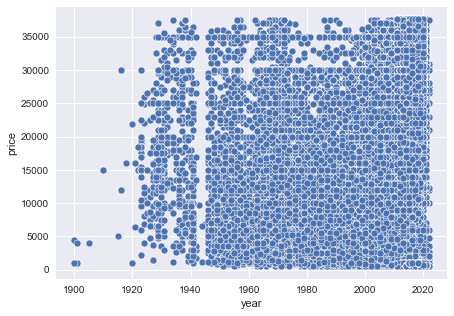

In [39]:
# now check Year
plt.figure(figsize=[7,5])
ax=sns.scatterplot(x = df_vehicle_data['year'],y=df_vehicle_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

From Above I see car data is available from 1900, which seems not a realisitic, lets consdier only data greater than or equal to 1950 for our model

In [40]:
# take only value until 3,00,000
df_vehicle_data=df_vehicle_data[(df_vehicle_data.year >= 1950 )]

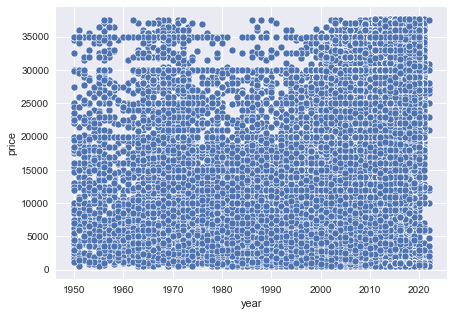

In [41]:
# Again check Year  
plt.figure(figsize=[7,5])
ax=sns.scatterplot(x = df_vehicle_data['year'],y=df_vehicle_data['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

Two related columns “condition” and “title_status”. since They are  similar and basically tells us about the state of used cars,  “odometer” feature is a continuous feature so it is better to group its values into several bins to refer.

In [42]:
bins= [0,30000,60000,90000,115000,150000,10000000]
groups = df_vehicle_data.groupby(['title_status',pd.cut(df_vehicle_data.odometer, bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 10000000]"
title_status,,,,,,
clean,51165,48011,49924,47078,57050,65017
lien,129,173,266,197,216,209
missing,141,67,72,107,75,118
parts only,24,14,9,17,23,35
rebuilt,1007,1538,1610,980,988,778
salvage,491,620,635,473,677,838


most of the title_status are clean, so we can add "Clean" to missing values.

We will also check "condition" feature

In [43]:
bins= [0,30000,60000,90000,115000,150000,10000000]
groups = df_vehicle_data.groupby(['condition',pd.cut(df_vehicle_data.odometer, bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 10000000]"
condition,,,,,,
excellent,6138,10915,17251,17895,21000,18800
fair,685,670,906,974,1416,3717
good,32426,22342,15816,12102,15914,23442
like new,3300,3134,3270,3094,3412,2462
new,4706,5726,5705,4907,5495,5741
salvage,150,224,185,217,246,355


In [44]:
m1=(df_vehicle_data['odometer'] > 60000) & (df_vehicle_data['odometer'] <= 150000)
m2=(df_vehicle_data['odometer'] <=60000) | (df_vehicle_data['odometer'] > 150000)

df_vehicle_data.loc[m1,'condition'] = df_vehicle_data.loc[m1,'condition'].fillna('excellent')
df_vehicle_data.loc[m2,'condition'] = df_vehicle_data.loc[m2,'condition'].fillna('good')

In [45]:
m1

27        False
28         True
30        False
31         True
32         True
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Name: odometer, Length: 335670, dtype: bool

In [46]:
# now I will combine both features("condition", "title_status")

df_vehicle_data['status'] = df_vehicle_data['condition'] + '&' + df_vehicle_data['title_status']
df_vehicle_data.drop(['condition','title_status'], axis=1, inplace=True)


C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\736051926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data['status'] = df_vehicle_data['condition'] + '&' + df_vehicle_data['title_status']
C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\736051926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data.drop(['condition','title_status'], axis=1, inplace=True)


In [47]:
missing_values_count = pd.DataFrame({'Null':df_vehicle_data.isnull().sum()})
total=len(df_vehicle_data)
percentage_null=round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by='Null',ascending=False)

,Null,Percentage
size,226267,67.4
cylinders,128026,38.1
drive,79704,23.7
type,46588,13.9
paint_color,42924,12.8
manufacturer,8704,2.6
status,4898,1.5
model,3462,1.0
fuel,1551,0.5
transmission,1001,0.3


Based on the above missing values percentage will devide the features into 3 groups and drop the "size" feature as it has the most number of "NaaN" Values

In [48]:
# first will drop under 5% rows with NaaN values 
df_vehicle_data=df_vehicle_data.dropna(subset=['transmission','fuel','model','manufacturer'])

In [49]:
df_vehicle_data.shape

(321104, 16)

Now will fill less than 25% NaN values feature with 'ffill' 

In [50]:
columns = ['drive','type','paint_color']
for i in columns:
  df_vehicle_data[i] = df_vehicle_data[i].fillna(method='ffill')

C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\1743644818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data[i] = df_vehicle_data[i].fillna(method='ffill')


In [51]:
# we can handle Cylinders feature NaN values with drive .
df_vehicle_data.groupby(['drive','cylinders']).cylinders.count()


drive  cylinders   
4wd    1 cylinder          1
       10 cylinders      406
       12 cylinders       12
       2 cylinders         1
       3 cylinder          7
                       ...  
rwd    6 cylinder        130
       6 cylinders     15362
       8 cylinder        155
       8 cylinders     18321
       other             169
Name: cylinders, Length: 67, dtype: int64

In [52]:
#Based on the above we can take the value from Max value from each "drive" type
values={'4wd':'6 cylinders',
        '4x4':'6 cylinders',
        'awd':'4 cylinders',
        'fwd':'4 cylinders',
        'rwd':'8 cylinders'}

df_vehicle_data.loc[df_vehicle_data["cylinders"].isna(),'cylinders'] = df_vehicle_data.loc[df_vehicle_data["cylinders"].isna(),'drive'].map(lambda x:values[x])

since "region" and "state" are connected, we will combine both and drop "state" 
,"size" and "posting_date"

In [53]:
df_vehicle_data['region'] = df_vehicle_data['region']+'('+df_vehicle_data['state']+')'
df_vehicle_data.drop(['state','size','posting_date'], axis=1, inplace=True)

C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\3658667429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data['region'] = df_vehicle_data['region']+'('+df_vehicle_data['state']+')'
C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\3658667429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data.drop(['state','size','posting_date'], axis=1, inplace=True)


In [54]:
df_vehicle_data.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
paint_color      object
status           object
dtype: object

out of 13 features 10 are categorical , lets apply Label encoder to each categorical feature

In [55]:
from sklearn.preprocessing import LabelEncoder
cat_features=['region','manufacturer','model','cylinders','fuel','transmission','drive','type','paint_color','status']
encoder=LabelEncoder()
encoded=df_vehicle_data[cat_features].apply(encoder.fit_transform)
df_vehicle_data.drop(cat_features,axis=1,inplace=True)
df_vehicle_data=pd.concat([encoded,df_vehicle_data],axis=1)
df_vehicle_data.head(2)

C:\Users\nbaga\AppData\Local\Temp\ipykernel_11316\2262301554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicle_data.drop(cat_features,axis=1,inplace=True)


,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,price,year,odometer
27,18,14,16599,16,2,2,5,7,10,12,33590,2014.0,57923.0
28,18,7,16841,16,2,2,5,7,1,12,22590,2010.0,71229.0


# 6) Create dummy variables if necessary.

Dummy variables are not necessary for this model

# Project Milestone 3

In this project I am going to use "Random Forest Regression" model to get the "price" predictions
,this model has the power to handle large data set with hightest dimensionality and it won't allow 
over fitting to the model

To start with, first will devide the data into Train and Test set, we can take 80:20 distribution.

First will re-index the database and put the dependent variable "Price" as last column for a simpler splitter


In [56]:
# Lets change the order of the features and put the dependent variable at the end
column_names = ['region','manufacturer','model','cylinders','fuel','transmission','drive','type','paint_color','status','year','odometer','price']

In [57]:
df_vehicle_data = df_vehicle_data.reindex(columns=column_names)
df_vehicle_data.head(2)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,year,odometer,price
27,18,14,16599,16,2,2,5,7,10,12,2014.0,57923.0,33590
28,18,7,16841,16,2,2,5,7,1,12,2010.0,71229.0,22590


In [58]:
# lets split into Train and Test data.

X=df_vehicle_data.iloc[:,:-1]
y=df_vehicle_data.iloc[:,-1]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

 Feature scaling , it is important to always do it AFTER splitting the database to avoid data leakages in machine learning model.

In [60]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

Fit the model in the Training Set using the Cross-Validation method in order to estimate the accuracy of the model more precisely. I will be utilising the R-squared metric to evaluate the performance of the model and I will transform the values we get from R square into percentage. 


In [61]:
# Random Forest

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

scores=[]
forest = RandomForestRegressor(n_estimators=20, random_state=0)
acc = cross_val_score(forest,X_train, y_train,scoring='r2',cv=5)
scores.append(round(acc.mean()*100,2))

In [62]:
results = pd.DataFrame({'Metrics':['R2'],
                        'Accuracy':scores})
results

,Metrics,Accuracy
0,R2,87.38


 We got 87.38%, which is not bad, but we still can improve by tuning the hyper parameter

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap':[True,False],
    'max_depth':[80,90,100],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[8,10,12],
    'n_estimators':[100,200,300]
}
forest=RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=forest, param_grid = param_grid,cv=3,n_jobs=-1, verbose =2)

In [65]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


{'bootstrap': False,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [66]:
scores2=[]
best_grid=grid_search.best_estimator_
acc2=cross_val_score(best_grid,X_train,y_train,scoring='r2',cv=5)
scores2.append(round(acc2.mean()*100,2))

In [67]:
results=pd.DataFrame({
    'Metrics':['R2'],
    'Accuracy':scores,
    'Accuracy Tuned Param':scores2})
results

,Metrics,Accuracy,Accuracy Tuned Param
0,R2,87.38,87.13


 From the picture above, the score  even went down after doing the optimisation of the Hyper-parameters.

After training the model from train data, lets check how does it work for the test data 

In [71]:
from sklearn.metrics import r2_score

best_grid=grid_search.best_estimator_
y_pred=best_grid.predict(X_test)
acc_test = round(r2_score(y_test,y_pred)*100,2)

In [72]:
results=pd.DataFrame({
    'Metrics':['R2'],
    'Accuracy':scores,
    'Accuracy Tuned Param':scores2,
    'Accuracy Test Set':acc_test})
results

,Metrics,Accuracy,Accuracy Tuned Param,Accuracy Test Set
0,R2,87.38,87.13,88.08


The results seems to be pretty solid,which shown the good performance of our modelin both train and test sets. The score is even more accurate in its prediction in the Test Set(88.08%) is great.

Conclusion:-
    For this project I have used a single model(Random Forest Regressor) to predict the price of used cars.it has shown an excellent performance in such a big dataset and it has performed consistently through out the training and testing process, the test sets are even better than tain set data, it gave 88.0% accuracy in predictions.